<a href="https://colab.research.google.com/github/PhebeJ/ML-Assignment/blob/main/PhebeJoshua_MLAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classifying Documents using Naive Bayes,Chi-Square and Linear SVM**

---



---



##**Table of Contents:**


1. Introduction
2. Data Profiling
3. Data Pre-processing
4. Applying different models
5. Conclusion 





---



##**INTRODUCTION**

In this task, a data-set of different models of cars is used. The data-set had the following basic properties:

1. It was provided in .csv format.
2. The data-set simulated the real life scenario of cars and comprised of the make of the car, fuel-type, aspiration, number of doors etc. Since the data was labeled, in the context of machine learning, it was a Supervised Machine learning problem i.e. I had access to the data that was already correctly labeled and I had to train a model using this historical data. The main goal was to build a model that could accurately classify new and unseen data when it was input to it i.e. to assign proper class/label/category to a car when its input to the model. As the nature of the data was "text" so this project also involved extensive usage of text mining techniques as well. Text in its basic form is unstructured and to develop predictive models, the data needs to be thoroughly pre-processed. So the pipeline of developing models that I followed was: Data Profiling -> Data Cleansing -> Exploratory Analysis -> Data Preprocessing -> Feature Extraction and Selection -> Model Development -> Model Evaluation



---



##**DATA PROFILING**

The preliminary step in any data science project should be to develop familiarity with the data at hand. Transitioning right away to model development without knowing the basic characteristics of data can cause issues. So in this step, I computed a series of profiles so as to identify issues, perform quality checks and to get an idea of how different features of the data are distributed.


In [30]:
import nltk
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from pandas import DataFrame,Series
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('car_data.csv')

In [4]:
df.head(10)

,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,5000,21,27,13495
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,5000,21,27,16500
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,5000,19,26,16500
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,10.0,102,5500,24,30,13950
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,5500,18,22,17450
5,6,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,8.5,110,5500,19,25,15250
6,7,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,8.5,110,5500,19,25,17710
7,8,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,8.5,110,5500,19,25,18920
8,9,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,8.3,140,5500,17,20,23875
9,10,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,7.0,160,5500,16,22,?


In [5]:
print("The data-set has %d rows and %d columns"%(df.shape[0],df.shape[1]))

The data-set has 205 rows and 23 columns


In [6]:
from __future__ import print_function
print (df.columns)
for col_name in df.columns:
    print (col_name,end=": ")
    print (sum(df[col_name].isnull()))

Index(['Unnamed: 0', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')
Unnamed: 0: 0
make: 0
fuel_type: 0
aspiration: 0
num_of_doors: 0
body_style: 0
drive_wheels: 0
engine_location: 0
wheel_base: 0
length: 0
width: 0
height: 0
curb_weight: 0
engine_type: 0
num_of_cylinders: 0
engine_size: 0
fuel_system: 0
compression_ratio: 0
horsepower: 0
peak_rpm: 0
city_mpg: 0
highway_mpg: 0
price: 0


In [7]:
sum(df.duplicated())

0

In [9]:
category_counter={x:0 for x in set(df['make'])}

In [13]:
for each_make in df['make']:
    category_counter[each_make]+=1
print(category_counter)

{'plymouth': 14, 'mazda': 34, 'saab': 12, 'jaguar': 6, 'audi': 14, 'toyota': 64, 'chevrolet': 6, 'mercury': 2, 'isuzu': 8, 'mitsubishi': 26, 'dodge': 18, 'mercedes-benz': 16, 'volkswagen': 24, 'volvo': 22, 'honda': 26, 'nissan': 36, 'renault': 4, 'alfa-romero': 6, 'porsche': 10, 'peugot': 22, 'bmw': 16, 'subaru': 24}


<BarContainer object of 22 artists>

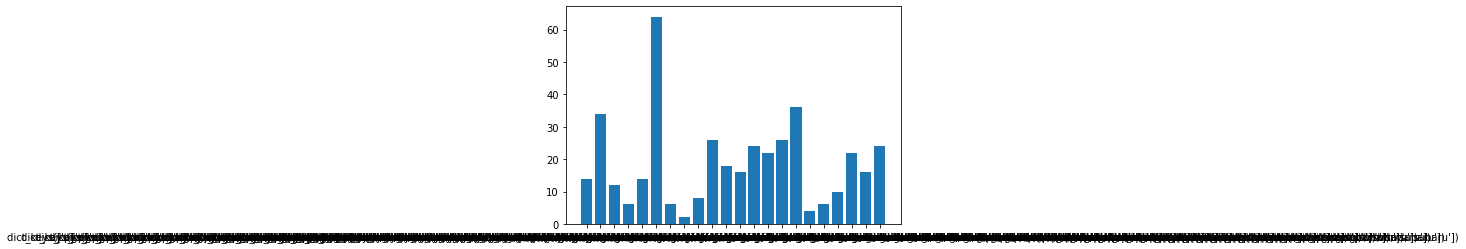

In [14]:
%matplotlib inline
plt.bar(range(len(category_counter)),category_counter.values(),align='center',tick_label=category_counter.keys())



---



##**DATA PRE-PROCESSING**
The data in its raw form isn't always suitable for developing analytical models. To make the raw data compliant for analysis, pre-processing steps have to be performed. The pre-processing steps depend largely on the type of analysis that one intends to perform for instance regression, classification or clustering. In our particular case, we want to perform multi-class classification and the data at hand is text. So to perform pre-processing, the following steps are performed:

1. Converting all of the data into lower case.
2. Stemming the words so as to further reduce the feature size
Also, in our given data set, I've made use of both the given features i.e. title and job description to create new features and for pre-processing. I've found that if we use both titles and job description, better features are formed and overall accuracy score of classifier is improved. title also contains the terms that can assist us in classification and that's why I've included them:

The following snippet of code performs these steps:

In [19]:
porter=nltk.PorterStemmer()
for each_row in df.itertuples():
    m1=map(lambda x: x, (each_row[2]+' '+each_row[3]).lower().split())
    m2=map(lambda x: porter.stem(x),m1)
    df.loc[each_row[0],'make_fueltype']=' '.join(m2)

In [20]:
df.head()

,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make_fueltype
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,5000,21,27,13495,alfa-romero ga
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,5000,21,27,16500,alfa-romero ga
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,5000,19,26,16500,alfa-romero ga
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,10.0,102,5500,24,30,13950,audi ga
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,5500,18,22,17450,audi ga


In [24]:
corpus=df.make_fueltype
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
tfidf_names=vectorizer.get_feature_names()

In [25]:
print("Number of TFIDF Features: %d"%len(tfidf_names))

Number of TFIDF Features: 26


In [26]:
training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

In [28]:
variables = tfidf_matrix

In [31]:
labels = df.make
variables_train, variables_test, labels_train, labels_test  =   train_test_split(variables, labels, test_size=.3)

In [32]:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

Shape of Training Data: (143, 26)
Shape of Test Data: (62, 26)




---



## **APPLYING MODELS**

###**Applying Naive Bayes:**

In [33]:
training_time_container.keys()

dict_keys(['b_naive_bayes', 'mn_naive_bayes', 'random_forest', 'linear_svm'])

In [34]:
from sklearn.naive_bayes import BernoulliNB

In [36]:
bnb_classifier=BernoulliNB()
t0=time()
bnb_classifier=bnb_classifier.fit(variables_train,labels_train)
training_time_container['b_naive_bayes']=time()-t0
t0=time()
bnb_predictions=bnb_classifier.predict(variables_test)
prediction_time_container['b_naive_bayes']=time()-t0

In [37]:
prediction_time_container['b_naive_bayes']

0.0018725395202636719

In [38]:
nb_ascore=sklearn.metrics.accuracy_score(labels_test, bnb_predictions)
accuracy_container['b_naive_bayes']=nb_ascore

In [39]:
print("Bernoulli Naive Bayes Accuracy Score: %f"%accuracy_container['b_naive_bayes'])
print("Training Time: %f"%training_time_container['b_naive_bayes'])
print("Prediction Time: %f"%prediction_time_container['b_naive_bayes'])

Bernoulli Naive Bayes Accuracy Score: 0.919355
Training Time: 0.007070
Prediction Time: 0.001873


In [40]:
print("Confusion Matrix of Bernoulli Naive Bayes Classifier output: ")
sklearn.metrics.confusion_matrix(labels_test,bnb_predictions)

Confusion Matrix of Bernoulli Naive Bayes Classifier output: 


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [42]:
print("Classification Metrics: ")
print(sklearn.metrics.classification_report(labels_test,bnb_predictions))

Classification Metrics: 
               precision    recall  f1-score   support

  alfa-romero       0.00      0.00      0.00         2
          bmw       1.00      1.00      1.00         1
    chevrolet       0.00      0.00      0.00         1
        dodge       1.00      1.00      1.00         1
        honda       1.00      1.00      1.00         6
       jaguar       0.00      0.00      0.00         1
        mazda       1.00      1.00      1.00         5
mercedes-benz       1.00      1.00      1.00         2
   mitsubishi       1.00      1.00      1.00         4
       nissan       0.71      1.00      0.83         5
     plymouth       1.00      1.00      1.00         3
      renault       0.00      0.00      0.00         1
         saab       1.00      1.00      1.00         2
       subaru       1.00      1.00      1.00         4
       toyota       0.84      1.00      0.91        16
   volkswagen       1.00      1.00      1.00         4
        volvo       1.00      1.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy of Naive Bayes is :0.919355






---



###**Applying Chi-Square Feature Selection**

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import linear_model
X_new = SelectKBest(chi2, k=15).fit_transform(variables,labels)

In [57]:
cvariables_train, cvariables_test, clabels_train, clabels_test  =   train_test_split(X_new, labels, test_size=.3)

In [58]:
svm_classifier2=linear_model.SGDClassifier(alpha=0.0001,penalty='elasticnet',max_iter=20)
svm_classifier_f2=svm_classifier2.fit(cvariables_train, clabels_train)
predictions_svm2=svm_classifier_f2.predict(cvariables_test)

sklearn.metrics.confusion_matrix(clabels_test,predictions_svm2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [59]:
sklearn.metrics.accuracy_score(clabels_test,predictions_svm2)

0.5806451612903226

**Accuracy Score of Chi-Square test is :0.5806451612903226 ** 

###**Applying Linear Classifier (SVM) using Stochastic Gradient Descent:**

In [53]:
from sklearn import linear_model

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

t0=time()
svm_classifier=svm_classifier.fit(variables_train, labels_train)
training_time_container['linear_svm']=time()-t0
print("Training Time: %fs"%training_time_container['linear_svm'])

t0=time()
svm_predictions=svm_classifier.predict(variables_test)
prediction_time_container['linear_svm']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['linear_svm'])

accuracy_container['linear_svm']=sklearn.metrics.accuracy_score(labels_test, svm_predictions)
print ("Accuracy Score of Linear SVM Classifier: %f"%accuracy_container['linear_svm'])
print(sklearn.metrics.confusion_matrix(labels_test,svm_predictions))

Training Time: 0.022060s
Prediction Time: 0.000764s
Accuracy Score of Linear SVM Classifier: 1.000000
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [54]:
svm_classifier_enet=linear_model.SGDClassifier(loss='hinge',alpha=0.0001,penalty='elasticnet')
svm_classifier_enet=svm_classifier_enet.fit(variables_train, labels_train)

In [55]:
svm_enet_predictions=svm_classifier_enet.predict(variables_test)
print ("Accuracy Score of Linear SVM Classifier: %f"%sklearn.metrics.accuracy_score(labels_test,svm_enet_predictions))

Accuracy Score of Linear SVM Classifier: 1.000000


*Accuracy Score of Linear SVM Classifier: 1.000000*



---



##**CONCLUSION**
 From the above models, it is very clear that Linear SVM Classifier is the winner in terms of Accuracy. 




---



---



***Submitted By*** 

Phebe Joshua

***M2 IS***

